# линейные отображения практика

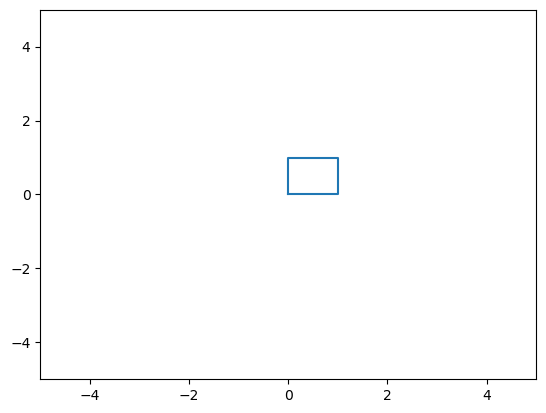

In [2]:
import numpy as np
import matplotlib.pyplot as plt

A = [
    [0,0],
    [0,1],
    [1,1],
    [1,0],
    [0,0]
]

A = np.array(A)
x = A[:,0]
y = A[:,1]

plt.plot(x,y)
plt.ylim([-5,5])
plt.xlim([-5,5])
plt.show()

In [5]:
# теперь применю линейной оператор

B = np.array([[2,0],[0,1]])

tt =[]
for kk in A:
    tt.append(B @ kk)

tt # 5 видоизмененных точек

[array([0, 0]), array([0, 1]), array([2, 1]), array([2, 0]), array([0, 0])]

In [7]:
res = B @ A.T
tt = res.T
tt # 5 видоизмененных точек можно и так


array([[0, 0],
       [0, 1],
       [2, 1],
       [2, 0],
       [0, 0]])

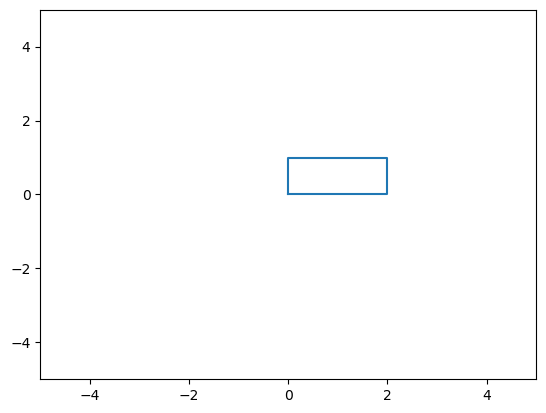

In [9]:
# подставляю tt в старый код
A = np.array(tt)
x = A[:,0]
y = A[:,1]

plt.plot(x,y)
plt.ylim([-5,5])
plt.xlim([-5,5])
plt.show()

In [10]:
B = np.array([[-1,-1],[1,3]])
res = B @ A.T
tt = res.T
tt # 5 видоизмененных точек

array([[ 0,  0],
       [-1,  3],
       [-3,  5],
       [-2,  2],
       [ 0,  0]])

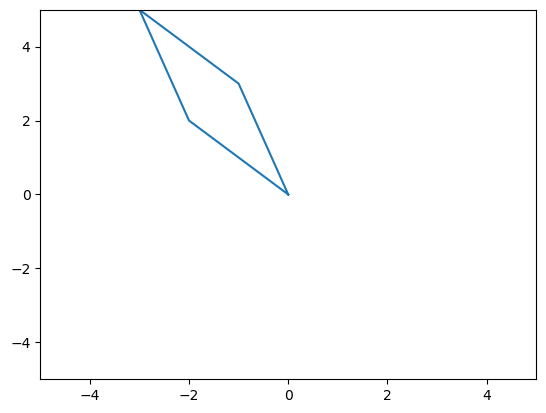

In [11]:
# подставляю tt в старый код
A = np.array(tt)
x = A[:,0]
y = A[:,1]

plt.plot(x,y)
plt.ylim([-5,5])
plt.xlim([-5,5])
plt.show()

# система линейных уравнений



In [12]:
A = np.array([[4, 3],[-5, 9]])
B = np.array([[20],[26]])



np.linalg.solve(матрица, вектор) # решает систему линейных уравнений

In [13]:
np.linalg.solve(A,B) # передаю матрицу и вектор

array([[2.],
       [4.]])

In [15]:
np.matmul(np.linalg.inv(A),B) # решает систему линейных уравнений

array([[2.],
       [4.]])

теперь посмотрим что елси для матрицы A нет обратной матрицы

In [16]:
np.linalg.det(A) # считает определитель матрицы

51.00000000000002

In [18]:
A = np.array([[4, 3],[-4, -3]])
B = np.array([[20],[26]])
np.linalg.det(A) # определитель равен 0, значит матрица необратима

0.0

In [20]:
np.matmul(np.linalg.inv(A),B) # LinAlgError: Singular matrix обратной матрицы нет и вот ошибка


LinAlgError: Singular matrix

# метод главных компонент

In [21]:
import numpy as np
from sklearn.decomposition import PCA

In [34]:
# буду использовать набор из 6 двумерных точек
X = np.array([[-1,-1], [-2, -1], [-3,-2], [1, 1], [2,1], [3,2]])


In [35]:
pca = PCA(n_components=2) # передаю количество главных компонент
pca.fit(X) 

PCA(n_components=2)

In [36]:
print(pca.explained_variance_ratio_) 

[0.99244289 0.00755711]


вот там видно что на первую главную компоненту приходится 99% данных а на втроую 1%
(примерно)

In [37]:
print(pca.singular_values_) # сингулярные значения


[6.30061232 0.54980396]


сингулярные значения это квадраты сингулярных чисел, тоесть это квадраты собственных значений. еще проще говоря это квадраты длины векторов

In [40]:
tt = []
for kk in X:
    for kk2 in X:
        tt.append(np.dot(kk,kk2))

tt # получаем вектор. 


[2,
 3,
 5,
 -2,
 -3,
 -5,
 3,
 5,
 8,
 -3,
 -5,
 -8,
 5,
 8,
 13,
 -5,
 -8,
 -13,
 -2,
 -3,
 -5,
 2,
 3,
 5,
 -3,
 -5,
 -8,
 3,
 5,
 8,
 -5,
 -8,
 -13,
 5,
 8,
 13]

In [44]:
def partition(l, n):
    for i in range(0, len(l), n):
        yield l[i:i + n]

res = list(partition(tt, len(X)))
res


[[2, 3, 5, -2, -3, -5],
 [3, 5, 8, -3, -5, -8],
 [5, 8, 13, -5, -8, -13],
 [-2, -3, -5, 2, 3, 5],
 [-3, -5, -8, 3, 5, 8],
 [-5, -8, -13, 5, 8, 13]]

In [45]:
# собственные значения
ls = np.linalg.eigvals(np.array(res))
ls


array([ 3.96977156e+01, -2.73309532e-16,  3.02284396e-01,  1.98401330e-17,
        6.18334655e-16, -5.68240243e-32])